**Benchmarking scAR using public data**
___

In [1]:
import scvi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scanpy as sc
import anndata as ad
sc.set_figure_params(figsize=(4, 4))

Global seed set to 0


In [2]:
#publication quality plots
import seaborn as sns
from matplotlib import pylab

params = {'legend.fontsize': 5,
          'figure.facecolor':"w",
          'figure.figsize': (3, 2),
          'axes.labelsize': 6,
          'axes.titlesize': 6,
         'axes.linewidth': 0.5,
         'xtick.labelsize': 5,
         'ytick.labelsize': 5,
          # set tick width
          'xtick.major.size': 3.5,
          'xtick.major.width': 0.5,
          'xtick.minor.size': 2,
          'xtick.minor.width': 0.5,
          'xtick.color': 'black',
          'ytick.major.size': 3.5,
          'ytick.major.width': 0.5,
          'ytick.minor.size': 2,
          'ytick.minor.width': 0.5,
          'ytick.color': 'black',
         'pdf.fonttype': 42,
         'figure.autolayout': True,
         'axes.grid':False,
         "figure.dpi":200}

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# pylab.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10});
pylab.rc('font',**{'family':'sans-serif','sans-serif':['Arial'], 'size':6})

# Set the font used for MathJax - more on this later
# pylab.rc('mathtext',**{'default':'regular'});

pylab.rcParams.update(params);

sns.set_palette("muted");
sns.set_style("ticks");
sns.despine(offset=4, trim=True);

<Figure size 600x400 with 0 Axes>

# Antibodies

In [3]:
mRNA_list = {'CD86': 'CD86',
            'CD274': 'CD274',
            'CD8a': 'CD8A',
            'CD56': 'CD56',
            'CD19': 'CD19',
            'CD45RA': 'PTPRC',
            'CD4': 'CD4',
            'CD14': 'CD14',
            'CD16': 'FCGR3A',
            'CD25': 'IL2RA',
            'CD45RO': 'PTPRC',
            'TIGIT': 'TIGIT',
            'CD20': 'MS4A1',
            'CD335': 'NCR1',
            'CD69': 'CD69',
            'CD62L': 'SELL',
            'CD197': 'CCR7',
            'CD27': 'CD27',
            'HLA-DR': 'HLA-DRA',
            'CD278': 'ICOS',
            'CD137': 'TNFRSF9',
            'CD28': 'CD28',
            'CD127': 'IL7R',
            'CD86': 'CD86',
            'CD274': 'CD274',
            'CD3': 'CD3D',
            'CD56': 'NCAM1',
            'CD19': 'CD19',
            'CD11b': 'ITGAM',
            'CD15': 'FUT4',
            'CD20': 'CCR7',
            'CD34': 'CD34',
            'CD80': 'CD80',
            'PD-1': 'PDCD1',
            'IgG1_control': 'IGHG1',
            'IgG2a_control': 'IGHG2',
            'IgG2b_control': 'IGHG2',
            }

# for key in fb_filtered.columns.str.replace('_raw', ''):
#     mRNA_list[key] = mRNA_list.pop(key)

In [4]:
# adata = scvi.data.pbmcs_10x_cite_seq(run_setup_anndata=False)
# adata.layers["counts"] = adata.X.copy()
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# adata.raw = adata

In [22]:
indir = "/da/onc/bfx/research/shengca1/public_data/10xgenomics/5k_pbmc_protein_v3/"
adata = sc.read_10x_mtx(indir+'/filtered_feature_bc_matrix', gex_only=False)
raw_prot = adata[:,adata.var['feature_types'] == 'Antibody Capture'].to_df().T
adata = adata[:,adata.var['feature_types'] == 'Gene Expression']

In [23]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
raw_mRNA = adata[:, list(set(mRNA_list.values()))].to_df().T  # Raw counts

In [7]:
# sc.pp.log1p(adata)
# adata.raw = adata
# adata.obsm['protein_expression'] = fb_filtered

In [8]:
# scvi.model.TOTALVI.setup_anndata(
#     adata,
#     protein_expression_obsm_key="protein_expression",
#     layer="counts", 
#     # batch_key="batch"
# )

In [9]:
# vae = scvi.model.TOTALVI(adata, latent_distribution="normal")

In [10]:
# vae.train()

## totalVI

In [11]:
# adata.obsm["X_totalVI"] = vae.get_latent_representation()

# rna, protein = vae.get_normalized_expression(
#     n_samples=25, 
#     return_mean=True, 
#     # transform_batch=["PBMC10k", "PBMC5k"]
# )

# adata.layers["denoised_rna"], adata.obsm["denoised_protein"] = rna, protein

# adata.obsm["protein_foreground_prob"] = vae.get_protein_foreground_probability(
#     n_samples=25, 
#     return_mean=True, 
#     # transform_batch=["PBMC10k", "PBMC5k"]
# )
# parsed_protein_names = [p.split("_")[0] for p in adata.obsm["protein_expression"].columns]
# adata.obsm["protein_foreground_prob"].columns = parsed_protein_names

In [12]:
# protein.to_pickle('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/totalVI/protein.pickle')
# rna.to_pickle('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/totalVI/rna.pickle')

In [13]:
# adata.write('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/totalVI/totalVI_results.h5ad')

In [14]:
adata = sc.read('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/totalVI/totalVI_results.h5ad')

In [15]:
totalVI_mRNA = pd.DataFrame(adata.layers["denoised_rna"], index=adata.obs_names, columns=adata.var_names)
totalVI_mRNA = totalVI_mRNA[list(set(mRNA_list.values()))].T
totalVI_mRNA['meth'] = 'totalVI'

In [16]:
totalVI_prot = adata.obsm['denoised_protein']
totalVI_prot.columns = totalVI_prot.columns.str.replace('_TotalSeqB', '')
totalVI_prot = totalVI_prot.T
totalVI_prot['meth'] = 'totalVI'

## scAR

In [17]:
### Denoised counts
denoised_counts = pd.read_csv('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/scAR_out_mRNA/expected_natives.csv', index_col=0)
denoised_fb = pd.read_csv('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/scAR_out_fb/expected_natives.csv', index_col=0)
adata_scAR =  ad.AnnData(denoised_counts)
sc.pp.normalize_total(adata_scAR, target_sum=1e4)

scAR_mRNA = adata_scAR[:, list(set(mRNA_list.values()))].to_df().T
scAR_mRNA['meth'] = 'scAR'
scAR_prot = denoised_fb.copy().T
scAR_prot.index = scAR_prot.index.str.replace('_TotalSeqB','')
scAR_prot['meth'] = 'scAR'

## DCA

In [18]:
# read output
dca = pd.read_csv('/da/ONC/bfx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/dca/mean.tsv', sep='\t', index_col=0)
dca_fb = pd.read_csv('/da/ONC/bfx/research/shengca1/pipeline/obfx-fbdenoiser/CITEseq/5k_pbmc_protein_v3/dca_fb/mean.tsv', sep='\t', index_col=0)

In [19]:
### Denoised counts
adata_dca =  ad.AnnData(dca.T)
sc.pp.normalize_total(adata_dca, target_sum=1e4)
DCA_mRNA = adata_dca[:, list(set(mRNA_list.values()))].to_df()
DCA_mRNA = DCA_mRNA.T
DCA_mRNA['meth'] = 'DCA'
DCA_prot = dca_fb.copy()
DCA_prot.index = DCA_prot.index.str.replace('_TotalSeqB','')
DCA_prot['meth'] = 'DCA'

# Spearman's correlation

In [20]:
from scipy.stats import spearmanr

In [24]:
raw_mRNA['meth']='raw counts'
raw_prot['meth']='raw counts'
raw_prot.index = raw_prot.index.str.replace('_TotalSeqB', '')

In [25]:
mRNA = raw_mRNA.append(scAR_mRNA).append(totalVI_mRNA).append(DCA_mRNA).set_index('meth', append=True)
mRNA.index = mRNA.index.reorder_levels([1,0])
mRNA = mRNA.rename_axis(['meth', 'markers'])

PROT = raw_prot.append(scAR_prot).append(totalVI_prot).append(DCA_prot).set_index('meth', append=True)

## Remove several antibodies, comment out for full list of antibodies
idx=pd.IndexSlice
PROT = PROT.drop(index=idx[['IgG1_control','IgG2a_control', 'IgG2b_control', 'CD45RA', 'CD45RO', 
                            'CD15', 'CD34', 'CD80', 'CD137', 'CD274', 'CD278', 'PD-1'
                           ]]) #'CD69', 

PROT.index = PROT.index.reorder_levels([1,0])
PROT = PROT.rename_axis(['meth', 'markers'])

/da/onc/bfx/research/shengca1/tools/anaconda3/envs/general/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [26]:
adata_processed = sc.read('/da/ONC/BFx/research/shengca1/pipeline/obfx-fbdenoiser/manuscript/data/CITEseq_5k_PBMCs/processed_adata_20_11_2021.h5ad')
sorted_idx = adata_processed.obs.sort_values('celltype_1').index

PROT = PROT[sorted_idx]
mRNA = mRNA[sorted_idx]

In [27]:
# mRNA.loc[(mRNA.sum(axis=1)==0), 'ACGATGTCAATGTGGG-1']=1e-12
# PROT.loc[(PROT.sum(axis=1)==0), 'TGCTCCAAGGGAGGGT-1']=1e-12

In [28]:
corr_df = pd.DataFrame(index=PROT.index, columns=['corr', 'pval'])

for idx in corr_df.index.unique():
    meth, prot = idx
    sc_protein = PROT.loc[idx]
    sc_mrna = mRNA.loc[idx[0]].loc[mRNA_list[prot]]
    corr_df.loc[idx,['corr','pval']] = spearmanr(sc_protein, sc_mrna, nan_policy='omit')

In [29]:
corr_df_mRNA = pd.DataFrame(index=PROT.index, columns=['corr', 'pval'])

for idx in corr_df_mRNA.index.unique():
    meth, prot = idx
    sc_protein = PROT.loc[('raw counts', prot)]
    sc_mrna = mRNA.loc[idx[0]].loc[mRNA_list[prot]]
    corr_df_mRNA.loc[idx,['corr','pval']] = spearmanr(sc_protein, sc_mrna, nan_policy='omit')

In [30]:
corr_df_prot = pd.DataFrame(index=PROT.index, columns=['corr', 'pval'])

for idx in corr_df_prot.index.unique():
    meth, prot = idx
    sc_protein = PROT.loc[idx]
    sc_mrna = mRNA.loc[('raw counts', mRNA_list[prot])]
    corr_df_prot.loc[idx,['corr','pval']] = spearmanr(sc_protein, sc_mrna, nan_policy='omit')

In [31]:
corr_df['denoising'] = 'both'
corr_df_prot['denoising'] = 'protein'
corr_df_mRNA['denoising'] = 'mRNA'

corr_all = corr_df.append(corr_df_prot).append(corr_df_mRNA)

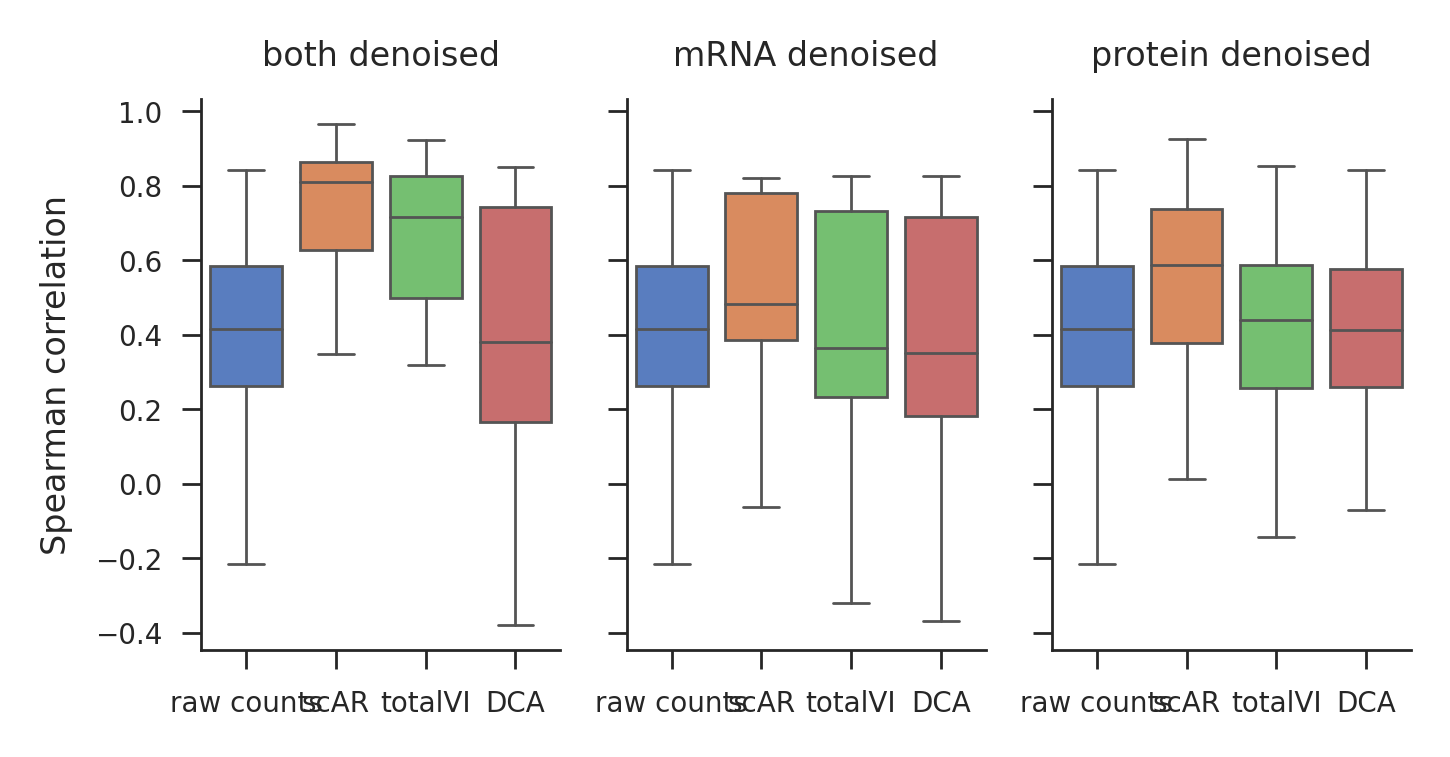

In [32]:
ax = sns.catplot(x = 'meth',
                 y = 'corr',
                 data=corr_all.reset_index(),
                 col='denoising', col_order=['both', 'mRNA', 'protein'],
                 height=2, aspect=0.6,
                 kind="box", dodge=True,
                 width=0.8, showfliers=False, linewidth=0.5,
                );
ax.set(xlabel='', ylabel='Spearman correlation');
ax.set_titles('{col_name} denoised')
# ax.set_xticklabels(ax.get_xticklabel(), rotation=45, ha='right')
# plt.savefig('/da/ONC/bfx/research/shengca1/pipeline/ods-scar/manuscript/figures/Fig5.benchmarking/boxplot_protein_RNA_correlation_denoised_09_12_2021.pdf')

In [33]:
corr_scatterplot = corr_all.reset_index()
corr_scatterplot = corr_scatterplot[corr_scatterplot['denoising']=='both'][['meth', 'markers', 'corr']]
corr_scatterplot = corr_scatterplot.pivot(index='markers', columns=['meth'])
corr_scatterplot.columns = corr_scatterplot.columns.droplevel(0)
tmp = corr_scatterplot[['scAR', 'totalVI', 'DCA']].unstack().to_frame('corr').reset_index().set_index('markers')
corr_scatterplot = tmp.join(corr_scatterplot[['raw counts']], how='left')

corr_scatterplot = corr_scatterplot.reset_index()
corr_scatterplot = corr_scatterplot.fillna(0)
corr_scatterplot.head()

,markers,meth,corr,raw counts
0,CD11b,scAR,0.862868,0.564060
1,CD11b,totalVI,0.910040,0.564060
2,CD11b,DCA,0.849173,0.564060
3,CD127,scAR,0.862684,0.790089
4,CD127,totalVI,0.915809,0.790089


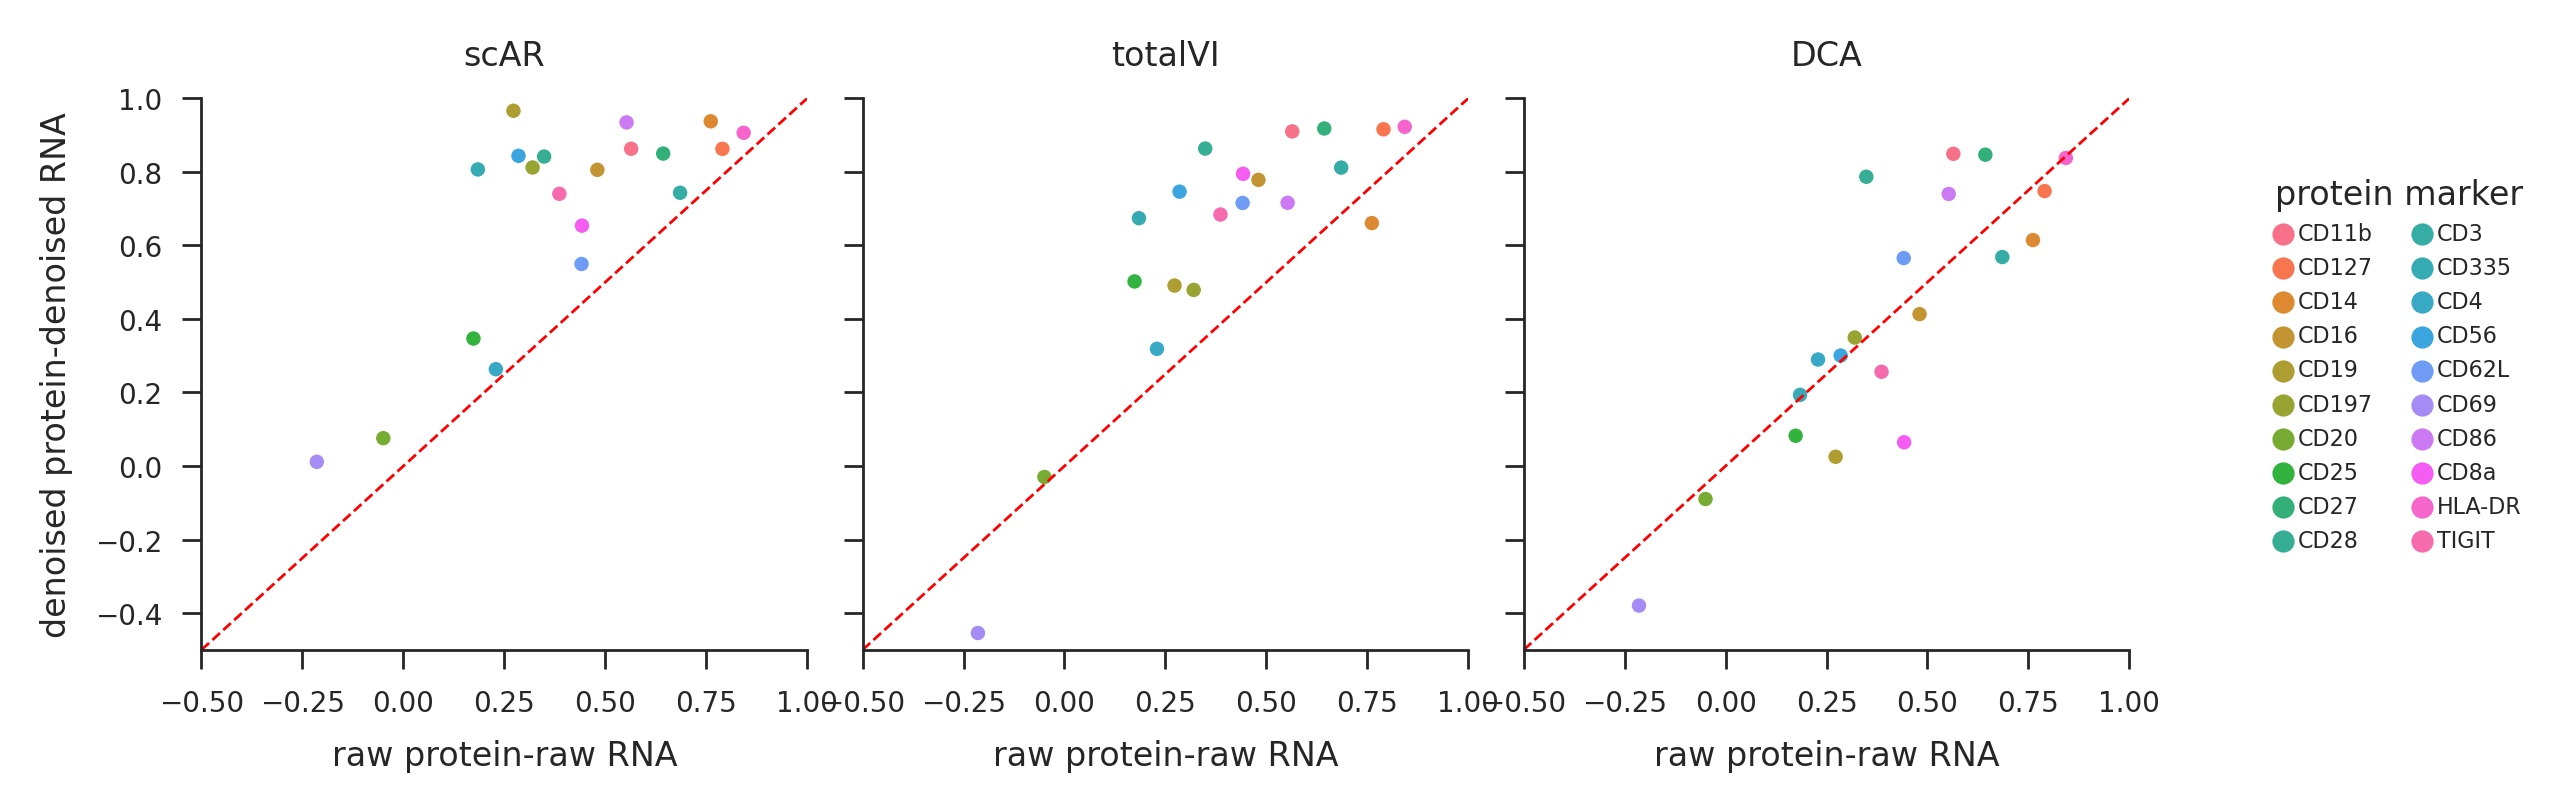

In [34]:
ax = sns.relplot(x= 'raw counts', y= 'corr', data=corr_scatterplot, 
                 hue='markers',
                 height=2,
                 aspect=0.9,
                 col ='meth', s=8);
[axe.plot([-0.5, 1],[-0.5, 1],ls='--',color='r',lw=0.5) for axe in ax.axes.flatten()]
ax.set(xlim=(-0.5,1),ylim=(-0.5,1));
ax.set_titles('{col_name}');
sns.move_legend(ax, "center right", bbox_to_anchor=(1.1, 0.55), ncol=2, title='protein marker', frameon=False, fontsize=4, markerscale=0.5, scatterpoints=1,);
ax.set(xlabel='raw protein-raw RNA', ylabel='denoised protein-denoised RNA');
# plt.savefig('/da/ONC/bfx/research/shengca1/pipeline/ods-scar/manuscript/figures/Fig5.benchmarking/protein_RNA_correlation_denoised_both_09_12_2021.pdf')

In [36]:
corr_scatterplot.head()

,markers,meth,corr,raw counts
0,CD11b,scAR,0.862868,0.564060
1,CD11b,totalVI,0.910040,0.564060
2,CD11b,DCA,0.849173,0.564060
3,CD127,scAR,0.862684,0.790089
4,CD127,totalVI,0.915809,0.790089
